<a href="https://colab.research.google.com/github/champsleague/Machine-Learning-Projects/blob/main/ML_phw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 2.1 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=96faa773bd626152663e98b689b8b36f38ab166ad91ccdea3640e5040a8405c1
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [32]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
df = df.replace('', np.nan)
df1 = df.dropna()


del df1['median_house_value']
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [33]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
df = df.replace('', np.nan)
df1 = df.dropna()

del df1['median_house_value']


# Checking for the labels in the categorical parameters 
print(df1['ocean_proximity'].unique())

#Checking for the label counts in the categorical parameters 
df1['ocean_proximity'].value_counts()

df2 = pd.get_dummies(df1, columns = ['ocean_proximity'])
df2

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,1,0,0,0


In [52]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
df = df.replace('', np.nan)
df1 = df.dropna()

del df1['median_house_value']
df1

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df1['ocean_prox_n'] = labelencoder.fit_transform(df1['ocean_proximity'])
df1

del df1['ocean_proximity']
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_prox_n
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1


In [59]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
df = df.replace('', np.nan)
df1 = df.dropna()

del df1['median_house_value']


# Checking for the labels in the categorical parameters 
print(df1['ocean_proximity'].unique())

#Checking for the label counts in the categorical parameters 
df1['ocean_proximity'].value_counts()

df2 = pd.get_dummies(df1, columns = ['ocean_proximity'])
df2

# scale features
scaler = StandardScaler()
model = scaler.fit(df2)
df_standard = model.transform(df2)
print(df_standard,"\n\n")

# scale features
scaler = MinMaxScaler()
model=scaler.fit(df2)
df_minmax=model.transform(df2)
print(df_minmax,"\n\n")

# scale features
scaler = MaxAbsScaler()
model=scaler.fit(df2)
df_maxabs=model.transform(df2)
print(df_maxabs,'\n\n\n')

# scale features
scaler = RobustScaler()
model=scaler.fit(df2)
df_robust=model.transform(df2)
print(df_robust,'\n\n\n')

# scale features
df_normalize = (df2 - df2.min())/ (df2.max() - df2.min())
df_normalize

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
[[-1.32731375  1.05171726  0.98216331 ... -0.01564487  2.82866074
  -0.38418614]
 [-1.32232256  1.04235526 -0.60621017 ... -0.01564487  2.82866074
  -0.38418614]
 [-1.33230494  1.03767426  1.85576873 ... -0.01564487  2.82866074
  -0.38418614]
 ...
 [-0.82320322  1.77727236 -0.92388486 ... -0.01564487 -0.35352419
  -0.38418614]
 [-0.87311515  1.77727236 -0.84446619 ... -0.01564487 -0.35352419
  -0.38418614]
 [-0.83318561  1.74918635 -1.00330353 ... -0.01564487 -0.35352419
  -0.38418614]] 


[[0.21115538 0.5674814  0.78431373 ... 0.         1.         0.        ]
 [0.21215139 0.565356   0.39215686 ... 0.         1.         0.        ]
 [0.21015936 0.5642933  1.         ... 0.         1.         0.        ]
 ...
 [0.31175299 0.73219979 0.31372549 ... 0.         0.         0.        ]
 [0.30179283 0.73219979 0.33333333 ... 0.         0.         0.        ]
 [0.30976096 0.72582359 0.29411765 ... 0.         0.         0.        ]] 


[[

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.0,1.0,0.0,0.0,0.0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.0,1.0,0.0,0.0,0.0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.0,1.0,0.0,0.0,0.0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.0,1.0,0.0,0.0,0.0


[1 3 1 ... 1 1 0]


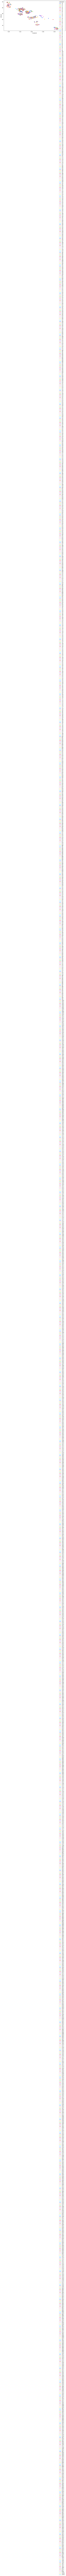

In [3]:
import io
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

df1 = df.drop(df.index[3000:20000])
 
# scale features
scaler = StandardScaler()
model = scaler.fit(df1)
df_standard = model.transform(df1)
# print(df_standard,'\n\n')




# Building KMeans model with K=4 (Training and Predicting)
# Instantiating
kmeans4 = KMeans(n_clusters = 4)

# Training the model
kmeans4.fit(df1)

# predicting
y_pred = kmeans4.fit_predict(df1)
print(y_pred)

# Storing the y_pred values in a new column
df1['Cluster'] = y_pred+1 #to start the cluster number from 1

plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=df1['longitude'], y = df1['latitude'], hue=df1['population'],palette='bright')


# # generate some data
# from sklearn.mixture import GaussianMixture

# gmm = GaussianMixture(n_components = 3)
# # Fit the GMM model for the dataset
# # which expresses the dataset as a
# # mixture of 3 Gaussian Distribution
# gmm.fit(df)

# # Assign a label to each sample
# labels = gmm.predict(df)

# df['labels']= labels
# d0 = df[df['labels']== 0]
# d1 = df[df['labels']== 1]
# d2 = df[df['labels']== 2]
 
# # plot three clusters in same plot
# plt.scatter(d0.iloc[0], d0.iloc[5], c ='r')
# plt.scatter(d1.iloc[0], d1.iloc[5], c ='yellow')
# plt.scatter(d2.iloc[0], d2.iloc[5], c ='g')


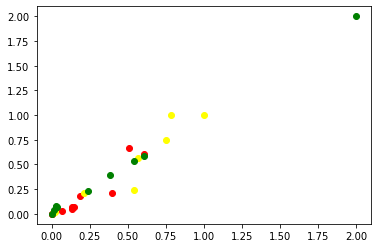

In [13]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())
df = df_normalize

# generate some data
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3)
# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(df)

# Assign a label to each sample
labels = gmm.predict(df)

df['labels']= labels
d0 = df[df['labels']== 0]
d1 = df[df['labels']== 1]
d2 = df[df['labels']== 2]
 
# plot three clusters in same plot
plt.scatter(d0.iloc[0], d0.iloc[5], c ='r')
plt.scatter(d1.iloc[0], d1.iloc[5], c ='yellow')
plt.scatter(d2.iloc[0], d2.iloc[5], c ='g')




CPU times: user 52.6 s, sys: 105 ms, total: 52.7 s
Wall time: 1min 1s


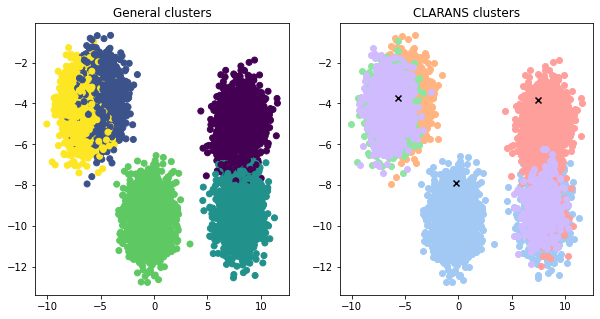

In [12]:
from pyclustering.cluster.clarans import clarans
from sklearn.datasets import make_blobs
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df
# synthetic clusters
df,c = make_blobs(10302,n_features=36,centers=5)

# implement clarans
clarans_instance = clarans(df.tolist(), 5, 2, 4);
%time clarans_instance.process()
clusters = clarans_instance.get_clusters()
medoids = clarans_instance.get_medoids()

fig,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].scatter(df[:,2],df[:,1],c=c)
axs[0].set_title('General clusters')
axs[1].set_title('CLARANS clusters')
for c_,m in zip(clusters,medoids):
    axs[1].scatter(df[c_,2],df[c_,1])
    axs[1].scatter(df[m,2],df[m,1],marker='x',c='black',label='medoids')

   housing_median_age  median_income
0        -2130.812105    -253.038829
1         4528.873775   -1033.067744
2        -1523.104386    -352.451514
3        -1653.973288    -204.721369
4        -1326.585693    -349.814522


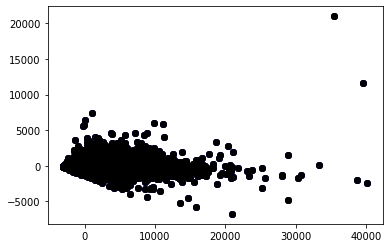

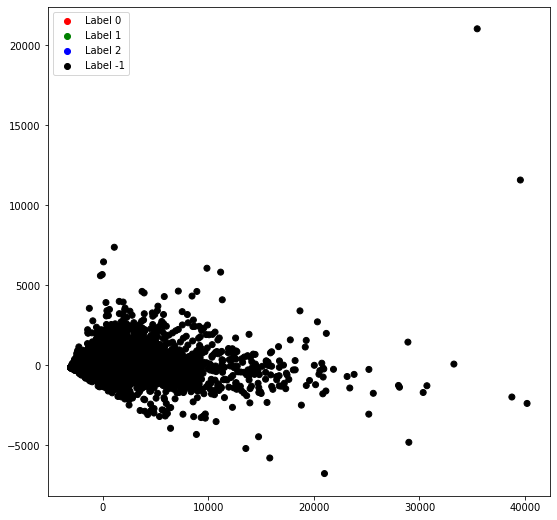

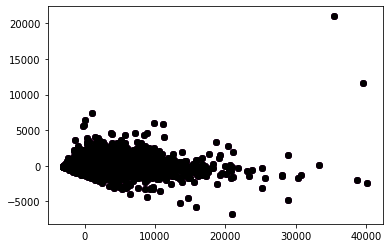

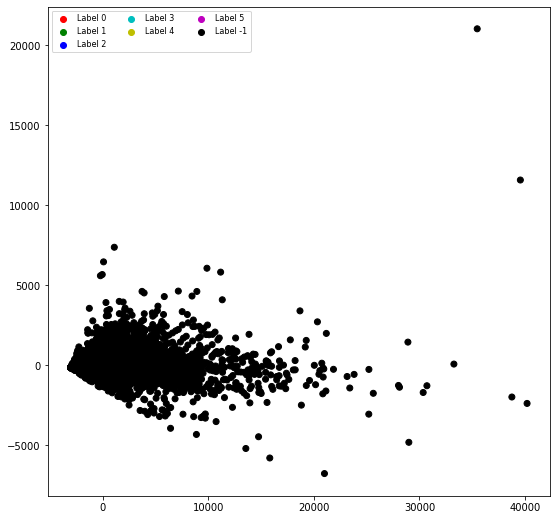

In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())

# Reducing the dimensionality of the data to make it visualizable
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['housing_median_age', 'median_income']
print(X_principal.head())

# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_


# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], color ='r');
g = plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], color ='g');
b = plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], color ='b');
k = plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()


colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

r = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[0])
g = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[1])
b = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[2])
c = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[3])
y = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[4])
m = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[5])
k = plt.scatter(
		X_principal['housing_median_age'], X_principal['median_income'], marker ='o', color = colors[6])

plt.figure(figsize =(9, 9))
plt.scatter(X_principal['housing_median_age'], X_principal['median_income'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
		('Label 0', 'Label 1', 'Label 2', 'Label 3 ','Label 4',
			'Label 5', 'Label -1'),
		scatterpoints = 1,
		loc ='upper left',
		ncol = 3,
		fontsize = 8)
plt.show()


cluster labels types: [   0    1    2 ... 3430 3431 3432]
bandwidth valule: 1198.663
cluster labels type: [   0    1    2 ... 3430 3431 3432]


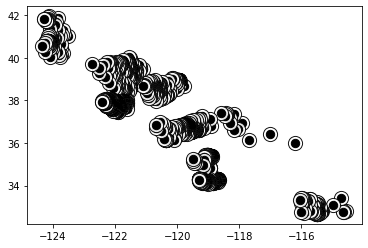

In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth

df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())
df1 = df.drop(df.index[3000:20000])
df1

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(df1)
print('cluster labels types:', np.unique(cluster_labels))


bandwidth = estimate_bandwidth(df1,quantile=0.25)
print('bandwidth valule:', round(bandwidth,3))

clusterDF = pd.DataFrame(data=df1, columns=['ftr1','ftr2'])
# clusterDF['target'] = y

# # calculate best bandwidth with estimate_bandwidth()
# best_bandwidth = estimate_bandwidth(df1, quantile=0.25)

# meanshift= MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(df1)
print('cluster labels type:',np.unique(cluster_labels)) 


clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # Apply scatter plot with different markers for each cluster
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k')
    
    # Centralized visualization by cluster
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9)
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k')
    
plt.show()

cluster labels types: [   0    1    2 ... 3430 3431 3432]
Estimated number of clusters: 24


Text(0, 0.5, 'Feature 2')

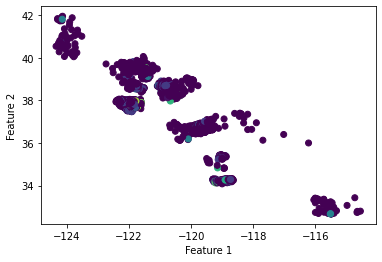

In [8]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth

df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())
df1 = df.drop(df.index[3000:20000])
df1

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(df1)
print('cluster labels types:', np.unique(cluster_labels))


bandwidth = estimate_bandwidth(df1, quantile=0.2, n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(df1)

labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print('Estimated number of clusters: ' + str(n_clusters_))

# Predict the cluster for all the samples
y_pred  = meanshift.predict(df1)

plt.scatter(df1.iloc[:,0], df1.iloc[:,1], c=y_pred, cmap="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [5]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth

df = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
# del df1['median_house_value']
# df = df1.replace('', np.nan)
# df= df.dropna()

# # creating an instance of labelencoder
# labelencoder = LabelEncoder()

# # Assigning numerical values and storing it in another column 'ocean_prox_n'
# df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
# del df['ocean_proximity']
# df


df.median_house_value

def split_dataframe_by_position(df, splits):

    # Takes a dataframe and an integer of the number of splits to create.
    # Returns a list of dataframes.

    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
    # split the range of data into N
split_dataframes = split_dataframe_by_position(df, 7)
print(split_dataframes[1])


from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# # Instantiate the KMeans models and set the value of k(n_clusters)
# km = KMeans(n_clusters=7, random_state=42)

# # Fit the KMeans model
# km.fit_predict(df)

# # Calculate Silhoutte Score
# score = silhouette_score(df, km.labels_, metric='euclidean')

# # Print the score
# print('Silhouetter Score: %.3f' % score)

# range_n_clusters = [2,3,4,5,6,7,8,9] 

# silhouette_avg = []
# for num_clusters in range_n_clusters:
 
#  # initialise kmeans
#  kmeans = KMeans(n_clusters=num_clusters)
#  kmeans.fit(df)
#  cluster_labels = kmeans.labels_
 
#  # silhouette score
#  silhouette_avg.append(silhouette_score(df, cluster_labels))
# plt.plot(range_n_clusters,silhouette_avg, 'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()


      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2948    -118.99     35.32                  26          875           199.0   
2949    -119.00     35.35                  31         2931           716.0   
2950    -118.99     35.35                  32         1293           317.0   
2951    -119.01     35.35                  34         1354           325.0   
2952    -119.01     35.34                  44         1730           343.0   
...         ...       ...                 ...          ...             ...   
5891    -118.34     34.16                  25         6082          1763.0   
5892    -118.32     34.17                  45         3448           690.0   
5893    -118.31     34.16                  38         2347           665.0   
5894    -118.32     34.16                  49         1074           170.0   
5895    -118.32     34.17                  40         1868           356.0   

      population  households  median_income  median_house_value

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6885     -118.09     34.06                  31         1146           289.0   
6886     -118.10     34.06                  31         2852           740.0   
6887     -118.10     34.06                  36         1463           369.0   
6888     -118.11     34.06                  30         1547           436.0   
6889     -118.09     34.05                  22         1764           357.0   
...          ...       ...                 ...          ...             ...   
13746    -117.15     34.07                  15         1852           316.0   
13747    -117.14     34.07                   3         5542           828.0   
13748    -117.14     34.06                  15         3057           510.0   
13749    -117.15     34.06                  25         3670           644.0   
13750    -117.14     34.05                   5         2634           359.0   

       population  households  median_income  ocean

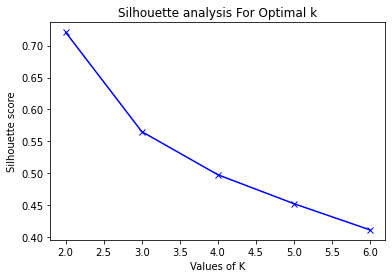

In [7]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MeanShift, estimate_bandwidth

df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df


def split_dataframe_by_position(df, splits):

    # Takes a dataframe and an integer of the number of splits to create.
    # Returns a list of dataframes.

    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
split_dataframes = split_dataframe_by_position(df, 3)
print(split_dataframes[1])


from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans model
km.fit_predict(df)

# Calculate Silhoutte Score
score = silhouette_score(df, km.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

range_n_clusters = [2,3,4,5,6] 

silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
[2 1 2 ... 6 6 6]


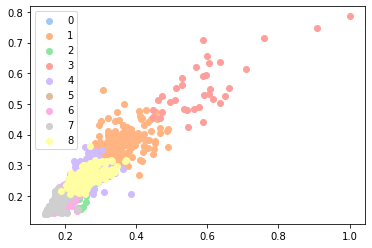

In [6]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()


# Checking for the labels in the categorical parameters 
print(df['ocean_proximity'].unique())

#Checking for the label counts in the categorical parameters 
df['ocean_proximity'].value_counts()

df3 = pd.get_dummies(df, columns = ['ocean_proximity'])



# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df3['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

df2 = df.drop(df.index[3000:20000])


# scale features
scaler = StandardScaler()
model = scaler.fit(df2)
df_standard = model.transform(df2)
# print(df_standard,'\n\n')

# scale features
scaler = MinMaxScaler()
model=scaler.fit(df_standard)
df_minmax=model.transform(df_standard)
# print(df_minmax,'\n\n')

# scale features
scaler = MaxAbsScaler()
model=scaler.fit(df_minmax)
df_maxabs=model.transform(df_minmax)
# print(df_maxabs,'\n\n\n')

# scale features
scaler = RobustScaler()
model=scaler.fit(df_maxabs)
df_robust=model.transform(df_maxabs)
# print(df_robust,'\n\n\n')

# scale features
df_normalize = (df_robust - df_robust.min())/ (df_robust.max() - df_robust.min())


#Initialize the class object
kmeans = KMeans(n_clusters= 9)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_normalize)
 
print(label)


#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
# 3 means 3rd array = total_rooms and 6 means 6th array = households
for i in u_labels:
    plt.scatter(df_normalize[label == i , 3] , df_normalize[label == i , 6] , label = i)
plt.legend()
plt.show()

[0 6 0 ... 2 2 2]


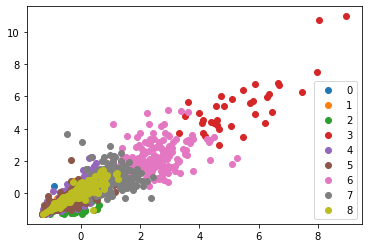

In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv(io.StringIO(uploaded['housing.csv'].decode('utf-8')))
del df1['median_house_value']
df = df1.replace('', np.nan)
df= df.dropna()


# # Checking for the labels in the categorical parameters 
# print(df['ocean_proximity'].unique())

# #Checking for the label counts in the categorical parameters 
# df['ocean_proximity'].value_counts()

# df3 = pd.get_dummies(df, columns = ['ocean_proximity'])



# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column 'ocean_prox_n'
df['ocean_prox_n'] = labelencoder.fit_transform(df['ocean_proximity'])
del df['ocean_proximity']
df

df2 = df.drop(df.index[3000:20000])


# scale features
scaler = StandardScaler()
model = scaler.fit(df2)
df_standard = model.transform(df2)
# print(df_standard,'\n\n')

# # scale features
# scaler = MinMaxScaler()
# model=scaler.fit(df_standard)
# df_minmax=model.transform(df_standard)
# # print(df_minmax,'\n\n')

# # scale features
# scaler = MaxAbsScaler()
# model=scaler.fit(df_minmax)
# df_maxabs=model.transform(df_minmax)
# # print(df_maxabs,'\n\n\n')

# # scale features
# scaler = RobustScaler()
# model=scaler.fit(df_maxabs)
# df_robust=model.transform(df_maxabs)
# # print(df_robust,'\n\n\n')

# # scale features
# df_normalize = (df_robust - df_robust.min())/ (df_robust.max() - df_robust.min())


#Initialize the class object
kmeans = KMeans(n_clusters= 9)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_standard)
 
print(label)


#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
# 3 means 3rd array = total_rooms and 6 means 6th array = households
for i in u_labels:
    plt.scatter(df_standard[label == i , 4] , df_standard[label == i , 5] , label = i)
plt.legend()
plt.show()